In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv("HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
#DATA EXPLORATION
left=df[df.left==1]
left.shape

(3571, 10)

In [54]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [55]:
#average number of all column
df.dtypes


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [56]:
## Quick Fix: Exclude non-numeric columns
df_numeric = df.select_dtypes(include='number')
df_numeric.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


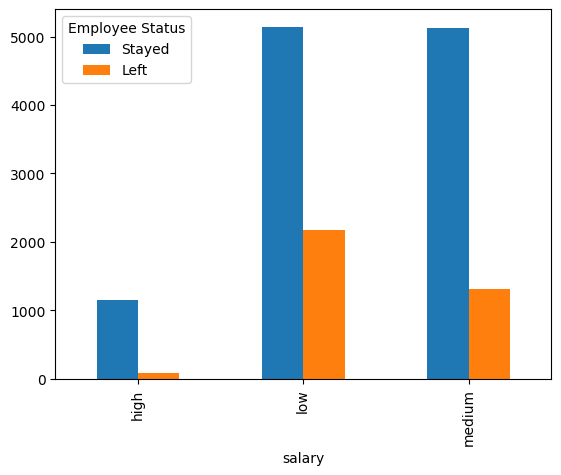

In [57]:
#Impact of salary on employee retention
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.legend(['Stayed', 'Left'], title='Employee Status')

In [58]:
# Above bar chart shows employees with high salaries are likely to not leave the company

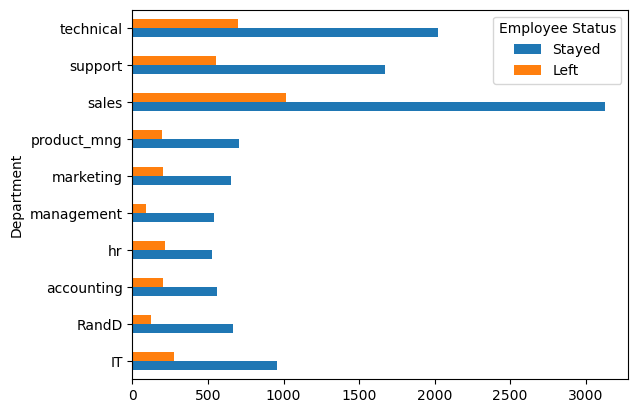

In [59]:
#Department wise employee retention rate
pd.crosstab(df.Department,df.left).plot(kind='barh')
plt.legend(['Stayed', 'Left'], title='Employee Status')

In [82]:
(df.columns)  # Check that 'salary_numeric' is present and 'salary' is gone
(df[['salary_numeric']].head())  # View the new column


,salary_numeric
0,0
1,1
2,1
3,0
4,0


In [78]:
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_numeric
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [101]:
## Features and target
X = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary_numeric']]
y = df['left']



In [102]:
## Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [103]:
## Model
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [105]:
model.fit(X_train, y_train)

LogisticRegression()

In [106]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
#Accuracy of the model
model.score(X_test,y_test)

0.7853333333333333